In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


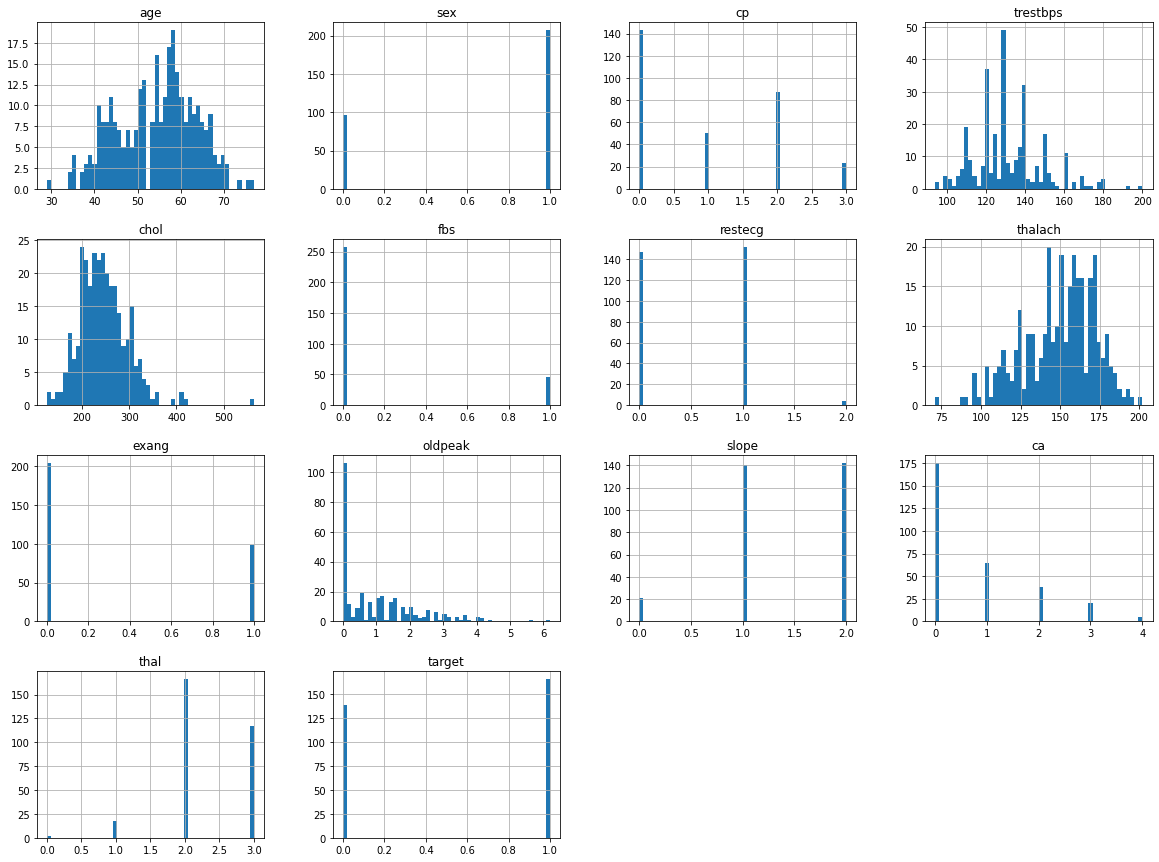

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
X = data.drop('target',axis=1)
y = data['target']

In [6]:
scaler = StandardScaler()
scaler.fit(X)
scaler_features = scaler.transform(X)

In [7]:
scaler_features

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaler_features,y, test_size=0.2, random_state=42)

In [9]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [10]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
X_train.shape

(242, 13)

In [13]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(14,activation="relu",input_shape=(13,)))
classifier.add(tf.keras.layers.Dense(8,activation="relu"))
classifier.add(tf.keras.layers.Dense(1.,activation="sigmoid"))



# classifier = Sequential()
# classifier.add(Dense(activation = "relu", input_dim = 13, 
#                      units = 8, kernel_initializer = "uniform"))
# classifier.add(Dense(activation = "relu", units = 14, 
#                      kernel_initializer = "uniform"))
# classifier.add(Dense(activation = "sigmoid", units = 1, 
#                      kernel_initializer = "uniform"))

In [14]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'] )

In [26]:
classifier.fit(X_train,y_train, batch_size=10, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0498 - accuracy: 0.9917 - val_loss: 1.4952 - val_accuracy: 0.8033
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0493 - accuracy: 0.9917 - val_loss: 1.5066 - val_accuracy: 0.8033
Epoch 3/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0486 - accuracy: 0.9917 - val_loss: 1.5105 - val_accuracy: 0.8033
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0478 - accuracy: 0.9917 - val_loss: 1.5161 - val_accuracy: 0.8033
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0471 - accuracy: 0.9917 - val_loss: 1.5319 - val_accuracy: 0.8033
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0465 - accuracy: 0.9959 - val_loss: 1.5305 - val_accuracy: 0.8197
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0458 - accuracy: 0.9917 - val_loss: 1.5396 - val_accuracy: 0.8033
Epoch 

In [27]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(y_pred[:10])

[[4.7396032e-05]
 [1.0154891e-01]
 [1.0000000e+00]
 [5.3776889e-11]
 [9.9019051e-01]
 [1.0000000e+00]
 [9.9930537e-01]
 [6.6975536e-35]
 [1.0407352e-17]
 [2.8346688e-02]]


In [28]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61

0.47540983606557374
